Shape of the dataset: (20634, 9)

Data types and info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20634 entries, 0 to 20633
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MedInc              20634 non-null  float64
 1   HouseAge            20634 non-null  int64  
 2   AveRooms            20634 non-null  float64
 3   AveBedrms           20634 non-null  float64
 4   Population          20634 non-null  int64  
 5   AveOccup            20634 non-null  float64
 6   Latitude            20634 non-null  float64
 7   Longitude           20634 non-null  float64
 8   price_above_median  20634 non-null  int64  
dtypes: float64(6), int64(3)
memory usage: 1.4 MB
None

 0mber of duplicate rows:

Statistical Summary:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20634.000000  20634.000000  20634.000000  20634.000000  20634.000000   
mean       3.870795     28.640399   

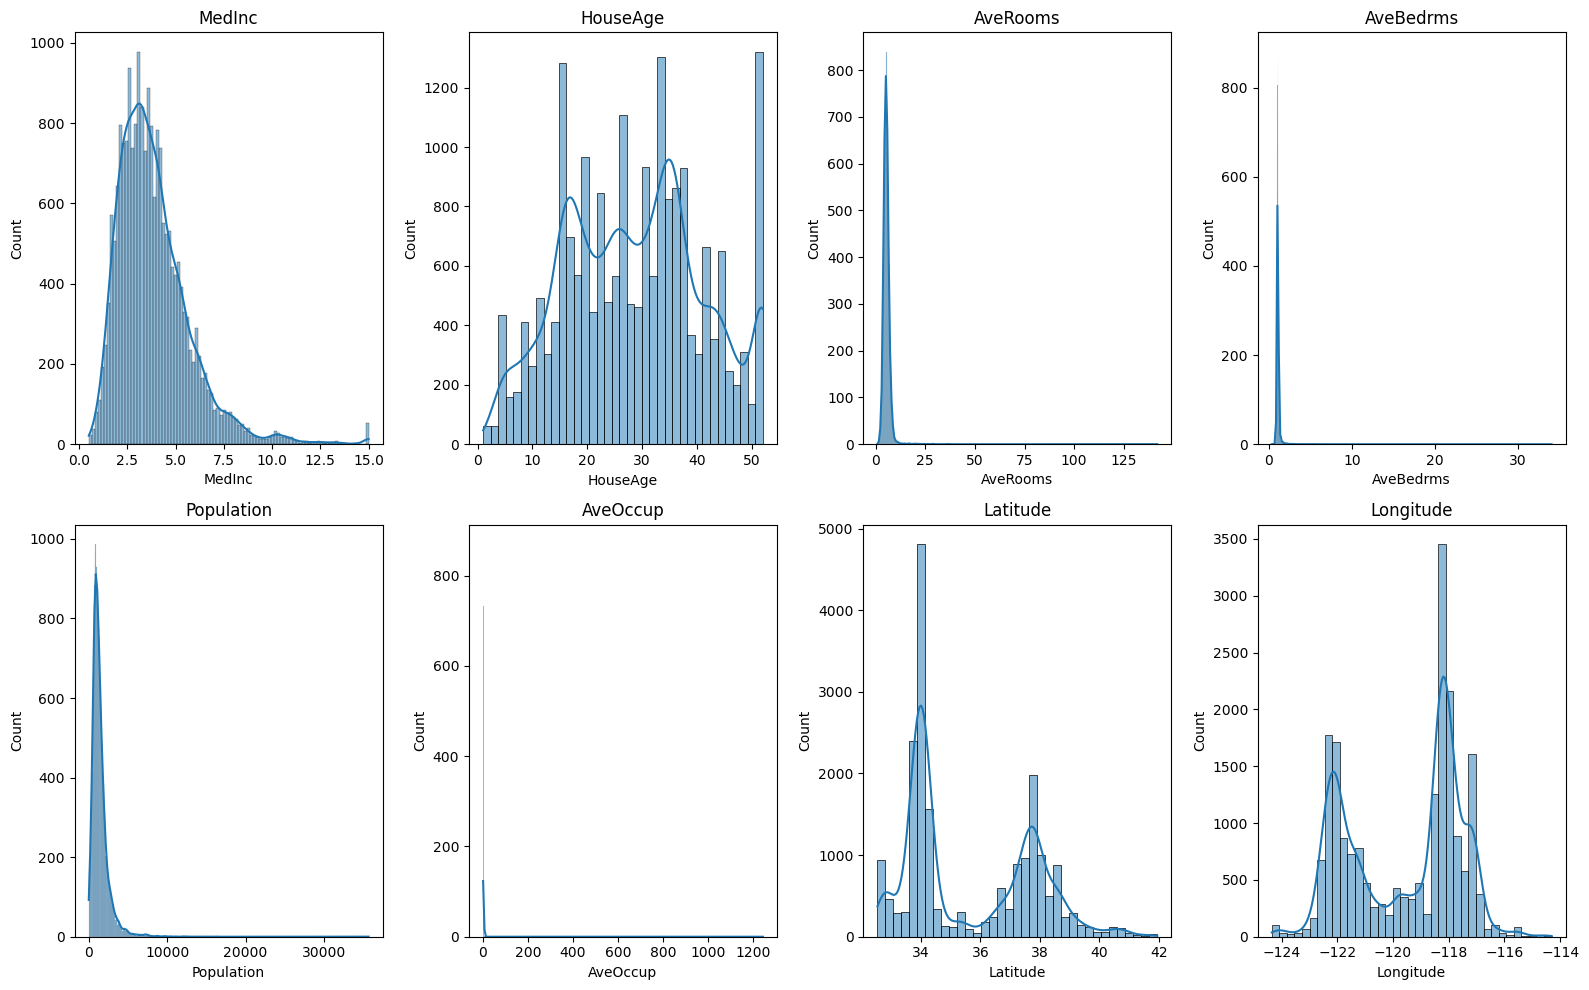

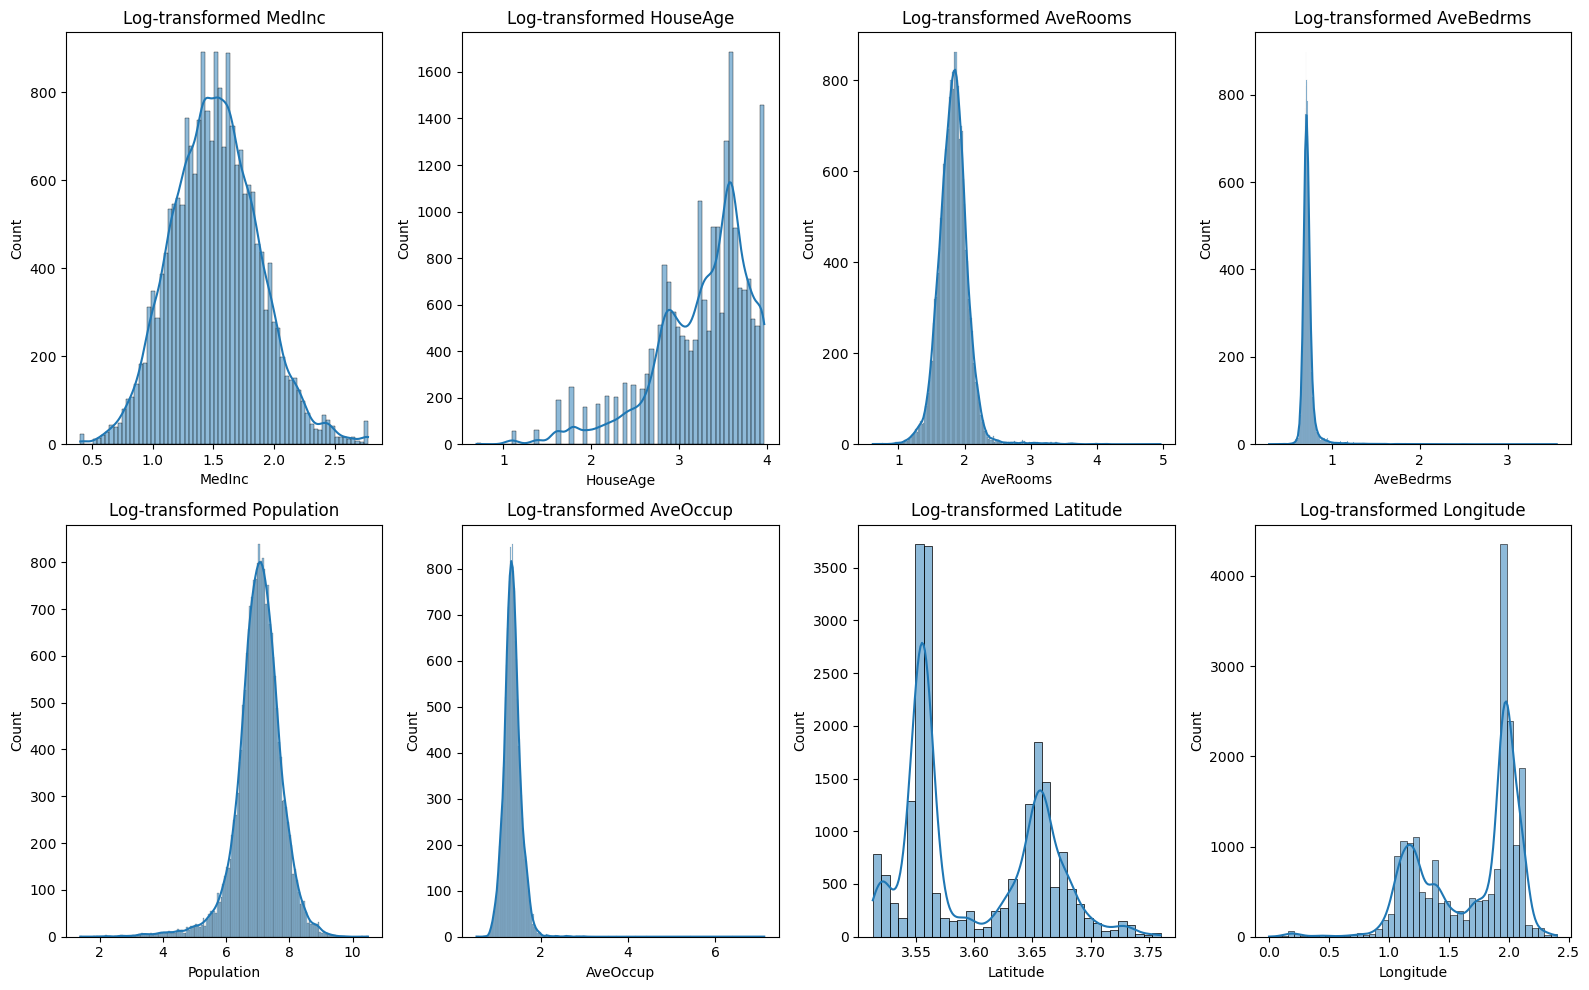

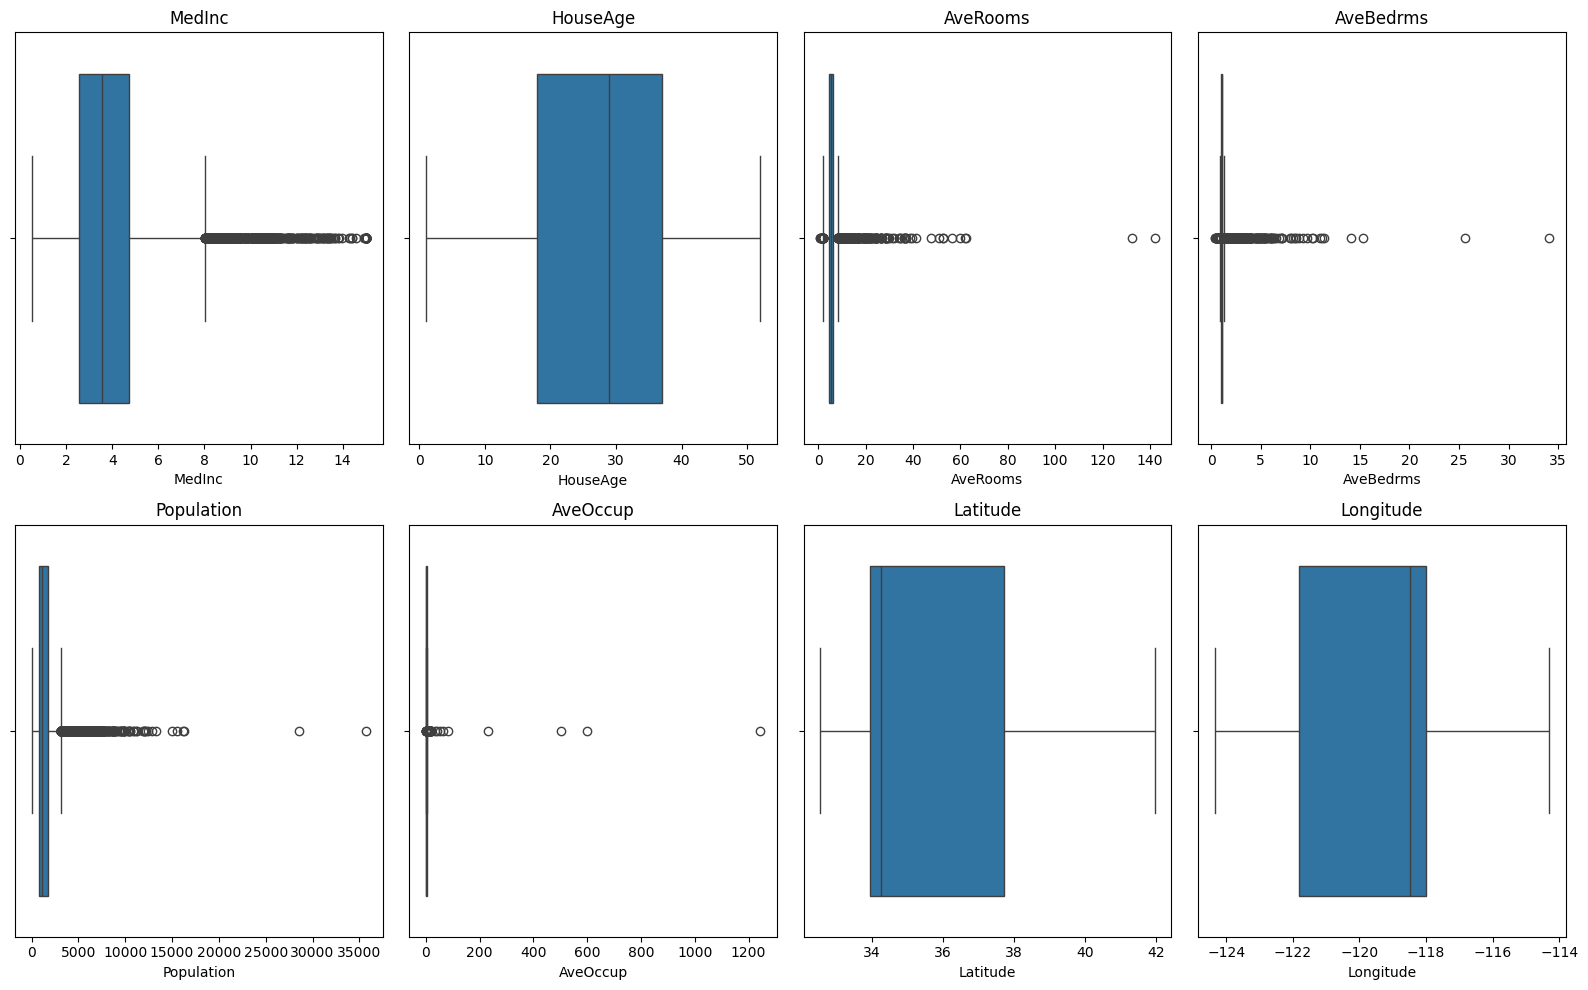

In [11]:
%pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('coe379_csv2.csv')

print("Shape of the dataset:", df.shape)

print("\nData types and info:")
print(df.info())

duplicate_count = df.duplicated().sum()
print("\nNumber of duplicate rows:", duplicate_count)
if duplicate_count > 0:
    df = df.drop_duplicates()

print("\nStatistical Summary:")
print(df.describe())

features = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']

plt.figure(figsize=(16, 10))
for i, col in enumerate(features):
    plt.subplot(2, 4, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.savefig('histograms_standard.png', dpi=300)
plt.show()

# ChatGPT helped me create this
def safe_log_transform(series):
    """
    Applies a log1p transform to a pandas Series.
    If the series contains non-positive values, it shifts the data
    so that the minimum value becomes zero.
    """
    if series.min() <= 0:
        shifted = series - series.min()
        return np.log1p(shifted)
    else:
        return np.log1p(series)

plt.figure(figsize=(16, 10))
for i, col in enumerate(features):
    plt.subplot(2, 4, i+1)
    transformed_data = safe_log_transform(df[col])
    sns.histplot(transformed_data, kde=True)
    plt.title(f'Log-transformed {col}')
plt.tight_layout()
plt.savefig('histograms_log_transformed.png', dpi=300)
plt.show()

plt.figure(figsize=(16, 10))
for i, col in enumerate(features):
    plt.subplot(2, 4, i+1)
    sns.boxplot(x=df[col])
    plt.title(col)
plt.tight_layout()
plt.savefig('boxplots.png', dpi=300)
plt.show()

In [6]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

X = df[features]
y = df['price_above_median']

# stratify
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42, stratify=y)

# standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {}

knn = KNeighborsClassifier()
param_grid_knn = {'n_neighbors': [3, 5, 7, 9]}
grid_knn = GridSearchCV(knn, param_grid_knn, cv=5)
grid_knn.fit(X_train_scaled, y_train)
models['KNN'] = (grid_knn.best_estimator_, X_train_scaled, X_test_scaled)

dt = DecisionTreeClassifier(random_state=42)
param_grid_dt = {'max_depth': [None, 5, 10, 15], 'min_samples_split': [2, 5, 10]}
grid_dt = GridSearchCV(dt, param_grid_dt, cv=5)
grid_dt.fit(X_train, y_train)
models['Decision Tree'] = (grid_dt.best_estimator_, X_train, X_test)

rf = RandomForestClassifier(random_state=42)
param_grid_rf = {'n_estimators': [50, 100, 200], 'max_depth': [None, 5, 10]}
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5)
grid_rf.fit(X_train, y_train)
models['Random Forest'] = (grid_rf.best_estimator_, X_train, X_test)

ada = AdaBoostClassifier(random_state=42)
param_grid_ada = {'n_estimators': [50, 100, 200], 'learning_rate': [0.5, 1.0, 1.5]}
grid_ada = GridSearchCV(ada, param_grid_ada, cv=5)
grid_ada.fit(X_train, y_train)
models['AdaBoost'] = (grid_ada.best_estimator_, X_train, X_test)

for name, (model, X_tr, X_te) in models.items():
    print(f"--- {name} ---")

    y_train_pred = model.predict(X_tr)
    print("Training Classification Report:")
    print(classification_report(y_train, y_train_pred))
    
    y_test_pred = model.predict(X_te)
    print("Test Classification Report:")
    print(classification_report(y_test, y_test_pred))
    
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, y_test_pred))
    print("\n")


/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.

--- KNN ---
Training Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      8253
           1       0.87      0.87      0.87      8254

    accuracy                           0.87     16507
   macro avg       0.87      0.87      0.87     16507
weighted avg       0.87      0.87      0.87     16507

Test Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.82      0.83      2064
           1       0.83      0.84      0.83      2063

    accuracy                           0.83      4127
   macro avg       0.83      0.83      0.83      4127
weighted avg       0.83      0.83      0.83      4127

Test Confusion Matrix:
[[1696  368]
 [ 325 1738]]


--- Decision Tree ---
Training Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.89      0.91      8253
           1       0.90      0.93      0.91      8254

    

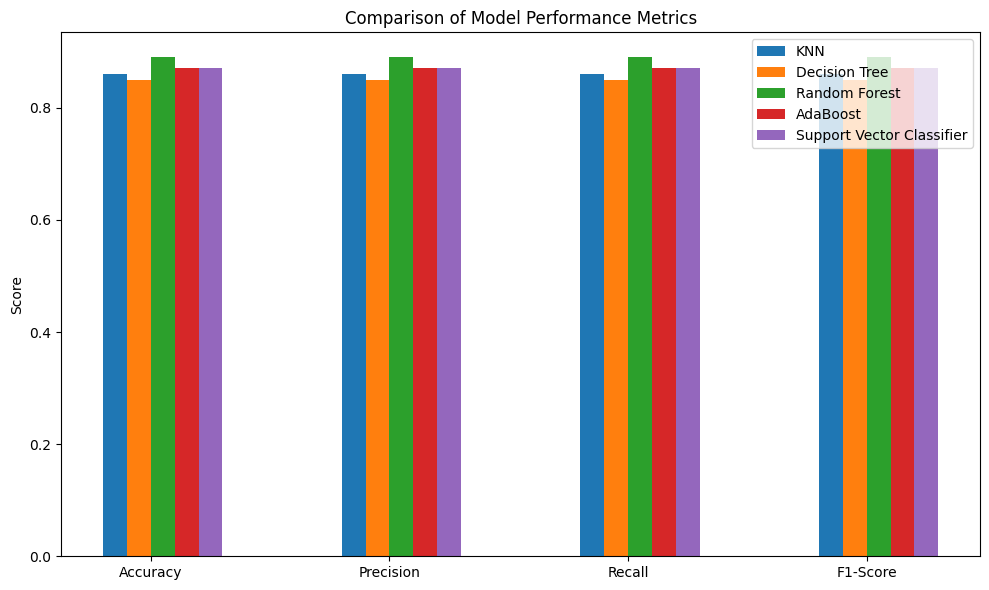

In [19]:
import numpy as np
import matplotlib.pyplot as plt

def plot_model_comparison():
    models = ['KNN', 'Decision Tree', 'Random Forest', 'AdaBoost', 'Support Vector Classifier']
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

    values = {
        'KNN': [0.86, 0.86, 0.86, 0.86],
        'Decision Tree': [0.85, 0.85, 0.85, 0.85],
        'Random Forest': [0.89, 0.89, 0.89, 0.89],
        'AdaBoost': [0.87, 0.87, 0.87, 0.87],
        'Support Vector Classifier': [.87, .87, .87, .87]
    }
    
    bar_width = 0.1
    x = np.arange(len(metrics))
    fig, ax = plt.subplots(figsize=(10, 6))
    
    for i, model in enumerate(models):
        ax.bar(x + i * bar_width, values[model], width=bar_width, label=model)
    
    ax.set_xticks(x + bar_width * 1.5)
    ax.set_xticklabels(metrics)
    ax.set_ylabel('Score')
    ax.set_title('Comparison of Model Performance Metrics')
    ax.legend()
    
    plt.tight_layout()
    plt.savefig('model_comparison_metrics.png', dpi=600)
    plt.show()

plot_model_comparison()


Training and tuning KNN...
Best parameters for KNN: {'knn__n_neighbors': 9, 'knn__weights': 'distance'}
KNN Test F1-score: 0.8559

Training and tuning Decision Tree...
Best parameters for Decision Tree: {'dt__max_depth': 10, 'dt__min_samples_split': 10}
Decision Tree Test F1-score: 0.8517

Training and tuning Random Forest...
Best parameters for Random Forest: {'rf__max_depth': None, 'rf__min_samples_split': 2, 'rf__n_estimators': 150}
Random Forest Test F1-score: 0.8893

Training and tuning AdaBoost...
Best parameters for AdaBoost: {'ab__learning_rate': 1.0, 'ab__n_estimators': 150}
AdaBoost Test F1-score: 0.8746

Training and tuning SVC...
Best parameters for SVC: {'svc__C': 10, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}
SVC Test F1-score: 0.8755



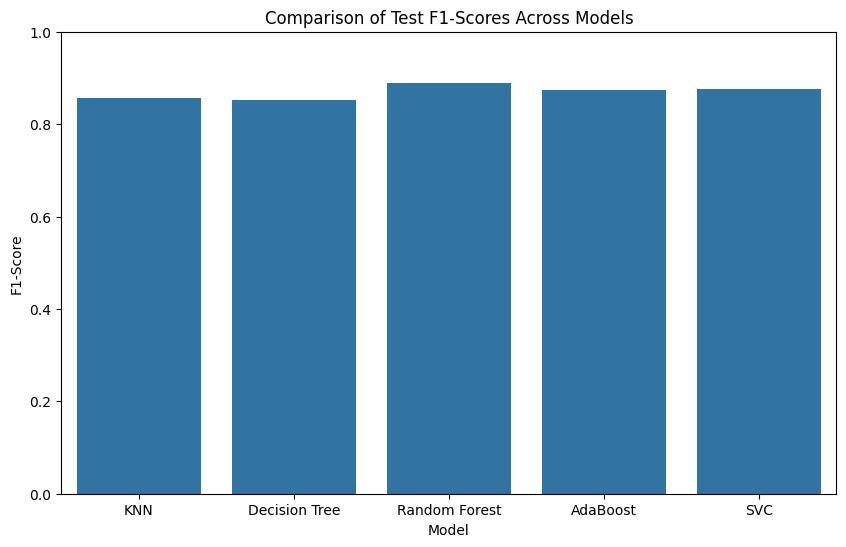

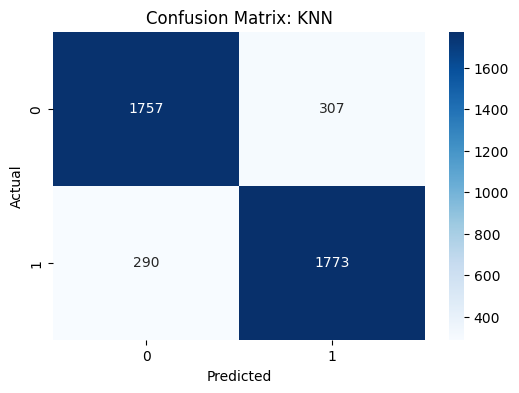

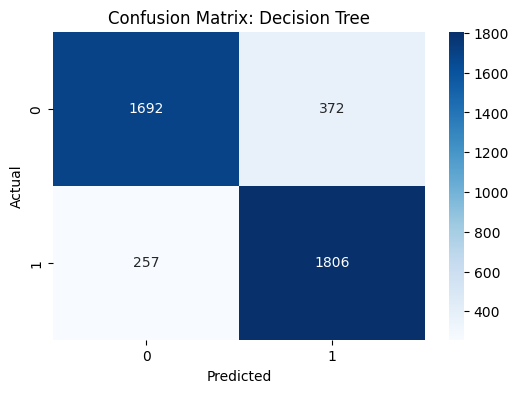

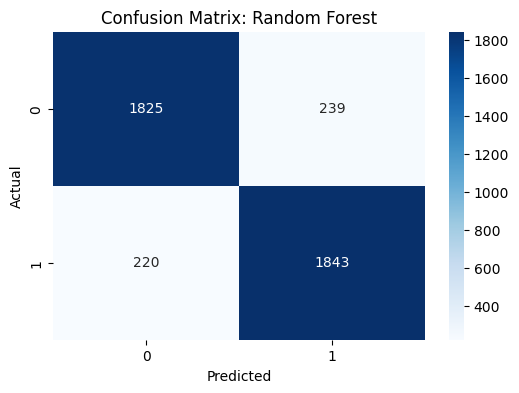

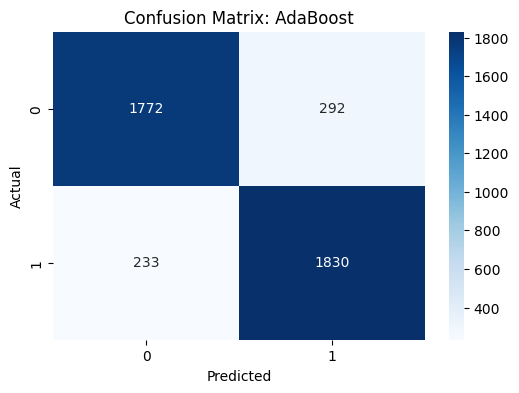

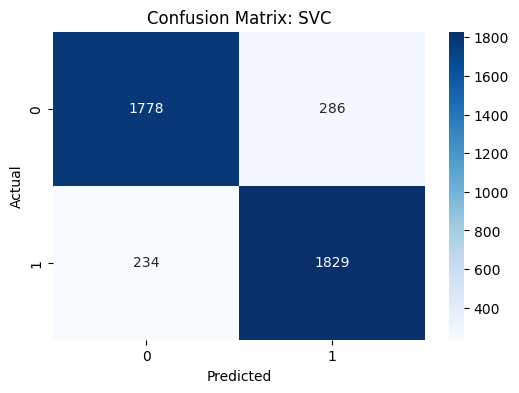

Classification Report for KNN on Test Set:
              precision    recall  f1-score   support

           0       0.86      0.85      0.85      2064
           1       0.85      0.86      0.86      2063

    accuracy                           0.86      4127
   macro avg       0.86      0.86      0.86      4127
weighted avg       0.86      0.86      0.86      4127



Classification Report for Decision Tree on Test Set:
              precision    recall  f1-score   support

           0       0.87      0.82      0.84      2064
           1       0.83      0.88      0.85      2063

    accuracy                           0.85      4127
   macro avg       0.85      0.85      0.85      4127
weighted avg       0.85      0.85      0.85      4127



Classification Report for Random Forest on Test Set:
              precision    recall  f1-score   support

           0       0.89      0.88      0.89      2064
           1       0.89      0.89      0.89      2063

    accuracy                 

In [15]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix

# Import classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC

data = pd.read_csv("coe379_csv2.csv")

features = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
target = 'price_above_median'

# log transform skewed features: population and aveoccup
def log_transform(X):
    X = X.copy()
    X['Population'] = np.log1p(X['Population'])
    X['AveOccup'] = np.log1p(X['AveOccup'])
    return X

log_transformer = FunctionTransformer(log_transform)
data_transformed = log_transformer.fit_transform(data)

X = data_transformed[features]
y = data_transformed[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

models = {}

knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])
knn_params = {
    'knn__n_neighbors': [3, 5, 7, 9],
    'knn__weights': ['uniform', 'distance']
}
models['KNN'] = (knn_pipeline, knn_params)

dt_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('dt', DecisionTreeClassifier(random_state=42))
])
dt_params = {
    'dt__max_depth': [None, 5, 10, 15],
    'dt__min_samples_split': [2, 5, 10]
}
models['Decision Tree'] = (dt_pipeline, dt_params)

rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(random_state=42))
])
rf_params = {
    'rf__n_estimators': [50, 100, 150],
    'rf__max_depth': [None, 5, 10],
    'rf__min_samples_split': [2, 5]
}
models['Random Forest'] = (rf_pipeline, rf_params)

ab_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ab', AdaBoostClassifier(random_state=42))
])
ab_params = {
    'ab__n_estimators': [50, 100, 150],
    'ab__learning_rate': [0.01, 0.1, 1.0]
}
models['AdaBoost'] = (ab_pipeline, ab_params)

svc_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(random_state=42))
])
svc_params = {
    'svc__C': [0.1, 1, 10],
    'svc__kernel': ['rbf', 'linear'],
    'svc__gamma': ['scale', 'auto']
}
models['SVC'] = (svc_pipeline, svc_params)

results = {}
best_estimators = {}

# cross val
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for model_name, (pipeline, param_grid) in models.items():
    print(f"Training and tuning {model_name}...")
    grid = GridSearchCV(pipeline, param_grid, cv=cv_strategy, scoring='f1', n_jobs=-1)
    grid.fit(X_train, y_train)
    best_model = grid.best_estimator_
    best_estimators[model_name] = best_model
    print(f"Best parameters for {model_name}: {grid.best_params_}")
    
    y_train_pred = best_model.predict(X_train)
    train_report = classification_report(y_train, y_train_pred, output_dict=True)
    
    y_test_pred = best_model.predict(X_test)
    test_report = classification_report(y_test, y_test_pred, output_dict=True)
    
    f1_test = test_report.get('1', test_report.get('weighted avg'))['f1-score']
    
    results[model_name] = {
        'train_report': train_report,
        'test_report': test_report,
        'f1_test': f1_test,
        'confusion_matrix': confusion_matrix(y_test, y_test_pred)
    }
    
    print(f"{model_name} Test F1-score: {f1_test:.4f}\n")

model_names = list(results.keys())
f1_scores = [results[name]['f1_test'] for name in model_names]

plt.figure(figsize=(10,6))
sns.barplot(x=model_names, y=f1_scores)
plt.title("Comparison of Test F1-Scores Across Models")
plt.ylabel("F1-Score")
plt.xlabel("Model")
plt.ylim(0, 1)
plt.show()

# ChatGPT helped with formating here
for model_name in model_names:
    cm = results[model_name]['confusion_matrix']
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix: {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

for model_name in model_names:
    print(f"Classification Report for {model_name} on Test Set:")
    print(classification_report(y_test, best_estimators[model_name].predict(X_test)))
    print("\n")